## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [17]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

boston = pd.read_csv('BostonHousing.csv')
x = boston.drop(columns = ['medv']).copy()
y = boston['medv']

In [18]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 90)

In [21]:
#Definindo árvores
arvore_1 = DecisionTreeRegressor(max_depth=2)

#Treinando árvores
arvore_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [22]:
path = arvore_1.cost_complexity_pruning_path(x_train, y_train)

In [23]:
ccp_alphas, impurezas = path.ccp_alphas, path.impurities

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [24]:
lista = []

for ccp in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp)
    arvore.fit(x_train, y_train)
    lista.append(arvore)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [25]:
train_mse_score = [mean_squared_error(y_train, clf.predict(x_train)) for clf in lista]
test_mse_score = [mean_squared_error(y_test, clf.predict(x_test)) for clf in lista]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

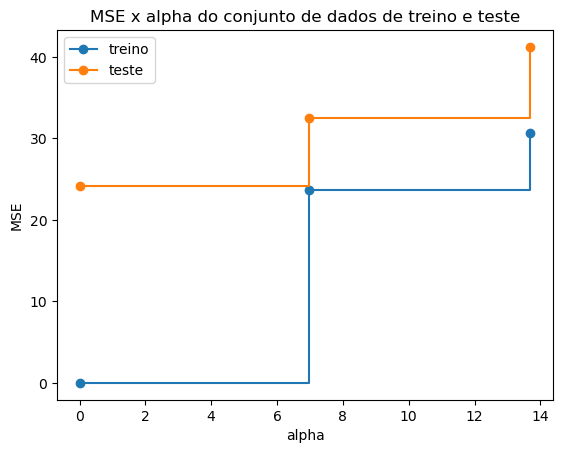

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_mse_score[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_mse_score[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [27]:
arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = 4)
arvore_final.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=4, random_state=0)

In [29]:
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(x_test, y_test):.2f}")
print(f"SE na base de testes: {mean_squared_error(y_test, arvore_final.predict(x_test)):.2f}")

Profundidade: 2
R-quadrado na base de testes: 0.65
SE na base de testes: 32.46


### 7. Visualize esta árvore.

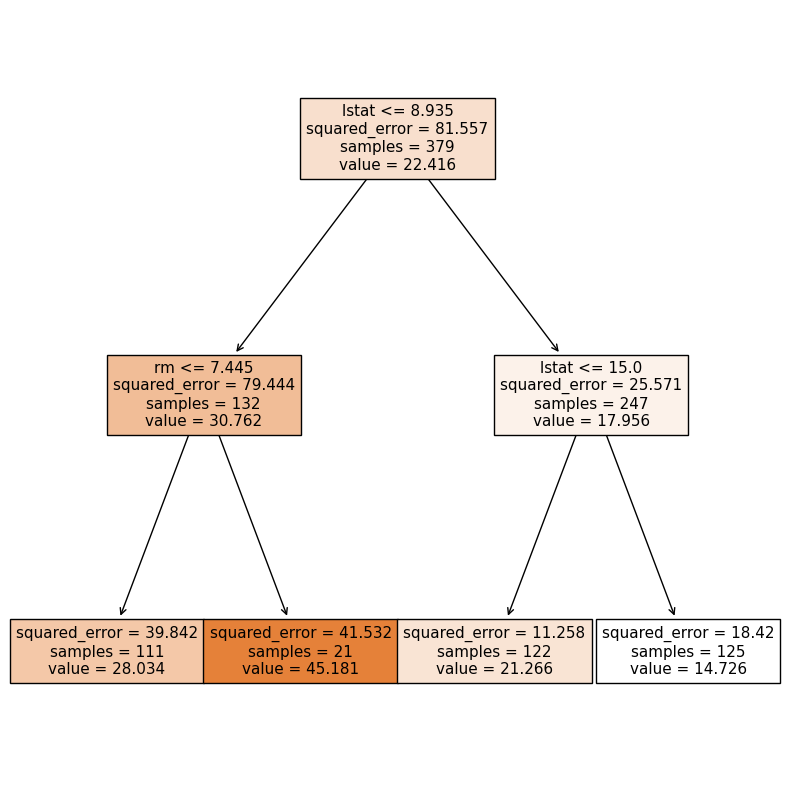

In [31]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=x.columns,  
                    filled=True) 